## Classification Metrics

- The first differentiator is estimating whether we are predicting a continuous point vs. trying to label it.
- The 2nd order is to realize that with regression, we are only concerned with distance from the other point and that there is no measure of whether something has more impact than another. example is someone falls down, do you call an ambulance or not. to understand, we can put this in a cost benefit matrix. where the cost of an ambulance is -100 but the cost of losing the life could be -1000. Classification tries to understand whether the outcome lands on fallen and was sick and should have called ambulane lost life, vs. fallen, nothing wrong called ambulance no issuss only lost -100 vs -1000. Regression cannot do this. 

- cost benefit matrix is done by first create 1 for cost, and one for benefit, then add the 2 up into a single matrix. that shows based on what I know at the moment these are the expected outcomes/values. 
- weight the cost benefits by multiplying the cost/benefit matrix with the confustion matrix. This will show that even though the benefit of saving a life, we could end up spending more money calling an ambulance each time because there will be 100's of cases where we call an ambulance, but only a few when someone needs it. 

- Type I and Type II errors applies to the four quadrant cost/benefit analysis. 
    - false positive - type I error. Alpha refers to the rate at which we will make the error. Incorrectly rejecting the null/baseline (person is okay) and calling the ambulance anyway. falsly classified as sick. 
    - False negative - Type II error. Beta refers to the rate we don't call the ambulance when really sick. Failing to reject, when the alternative is true. falsely said they were not sick when they were dying. :)

- Cost benefit matrix [4]

#### definitions below are a [4], on our scale of importance for interviews and knowing. 
- Accuracy: (TP + TN)/(TP + TN + FP + FN) we want high tp and tn 
- Sensitivity: TP/(TP + FN) we called this power and = 1 - $\beta$ and $\beta$ = FN/(FN + TP) we want higher power aka optimistic view 
- Specificity: is $1 - \alpha$ = TN/(FP + TN) fraction of truth over negative truth plus truth. we want this small so a pessimistic view.
- Recall - Usuaully in Machine learning most interested in this [4]: = sensitivity = power = recall = sensitivity = power 
- precision: Usuaully in Machine learning most interested in this [4] = positive predictive value: = TP /(TP + FP)
- false discovery rate: sometimes called (FDK, and q-value) very important in multiple testing. FP/(TP + FP) = 1- precision. 
    - bonferoni multiple test correction - look up for more info.
        - used as a tool to correct for multiple tests
        - conservative test, extremely conservative.


-- Remember the ROC curve with sensitivity (power) on the y-axis and x-axis is 1 - specificity $\alpha$ 
    - Receiver Operator Curve
    - to move more data counts from right column * to left col. o, we will call less * for both top and bottom
    - to move more data counts from left column o to right col. *, we will call more * for both top and bottom
    - by moving all *'s from right to left, we never have any FP, so alpha = $\alpha$ and we also have NO!!! Power!!!, Recall!!!, Senstitivity!!!
    - when we move everything over to the right, and we go through the ratio calculation for alpha and power we get 1,1 
    - What matters to me? FP or FN? if We go with 100% FP then our email is filter out as spam when it was an important legit email. 
    - play sandbox game and push either to the right or to the left and right columns wihc increases alpha. 

#### 3 levels of what goes into making a "Model" 
- 1. First is the algorithm.
- 2. 2nd is the data that goes into it. It is what it is, no change here. 
- 3. 3rd. however: we can modify how we slide around alpha/beta/power which changes the outcome predictions. which changes the "MODEL"
    - We can set something called threshold where I have the algorithm - 1, we have the data - 2. and we choose a fixed K. 
        - threshold is how many correctly match out of k can change. ie. we have 1 out of 1 that are red then the point is red. Or, we can change to 10 out of 10, then we have no alpha at that point. 





### Exercise:
- Draw many accuracy curves. similar to MSE curve we drew. Do this for 10 different samples. 
    - Metrics to draw:
        - Accuracy Curve
        - Sensitivity Curve
        - Specificity Curve
        - precision curve

        
    - x axis is the number of K
    - Y axis is curve
    - create confusion matrix to calculate curves above. 
    - perform with k-folds First!!!

    - (part 2) Pick a fixed K, then cycle through the thresholds (T) plot -  t/k 
        - (part 3) ROC curve
        - (part 4) make cost benefit matrix and graph with t on x-axis starting with t=-1 through t = k
    - [-1] for now... Eventually change out method of training and testing and compare them. 
        - n  Train on say 1000 data points and grab 1 billion new for testing: repeat multiple times:
            - LOO
            - Train/Test split what changes is my % of testing split
            - K-folds (k) is what changes here. 
            - Use MSE to score all of these models. 
            
### Homework 2: - (Friday)
- Decision Tree: learn what it is:
    - Regression - MSE
    - Classification - Entropy/Gini

- Acquire new dataset. 
    - Perform a regression
    - perform a classification
    
- Perform a comparison of KNN vs. Decision Tree
    - what are the choices to make?
    - what is my justification for each one, and substantiate. 

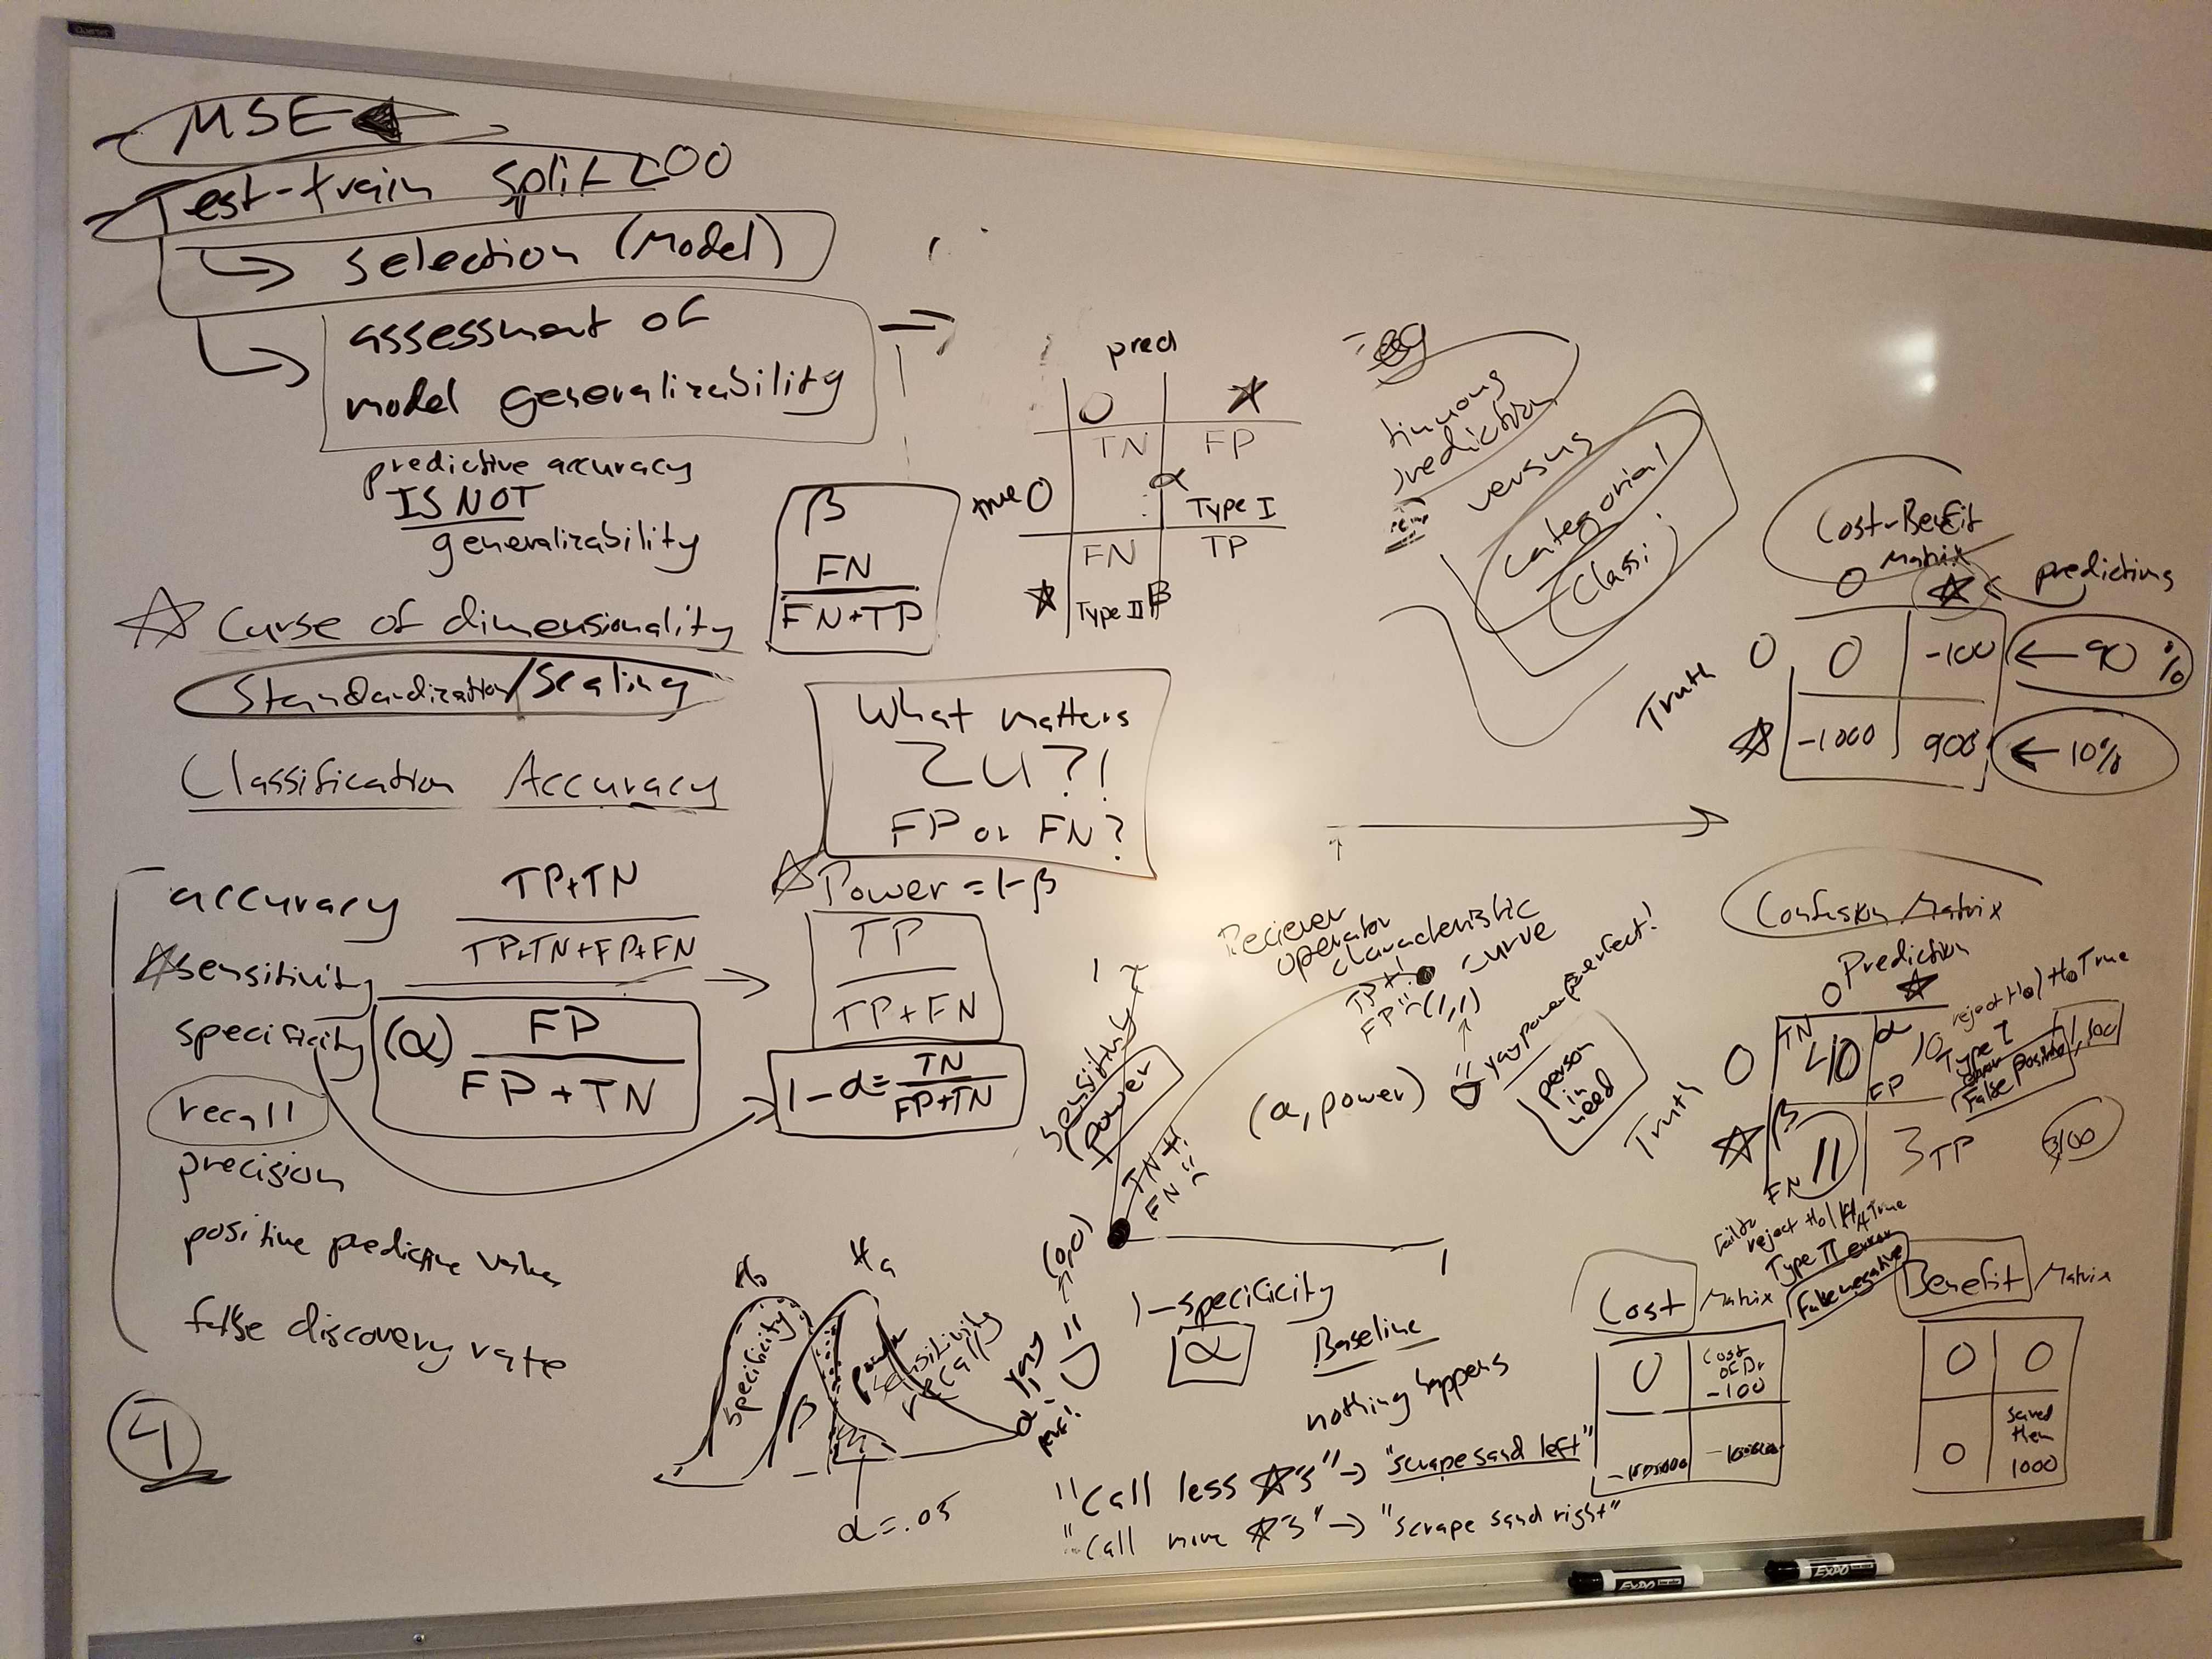

### Import libraries needed

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import scipy.stats as stats
from collections import Counter
import pandas as pd
import math as math

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

### Generate data:

In [136]:
def my_AB_XY_classification_data_builder(my_size = 50):
    '''Generate 2 classification data sets. 
    Each data point has an x, y and outcome that is either a 1 or a 0
    '''
    
    A_x_coordinates = stats.binom.rvs(loc=1, n=50, p=.6,size=my_size)
    A_y_coordinates = stats.binom.rvs(n=60, p=.7, size =my_size)
    B_x_coordinates = stats.binom.rvs(n=100, p=.25,size=my_size)
    B_y_coordinates = stats.binom.rvs(n=60, p=.7, size =my_size)
    ab_df = pd.DataFrame()

    ## next line I want to figure out how to create the columns and pass the data in one line. 
    ## vs. one at a time shown. 
    #     ab_df['A_x_coordinates', 'A_y_coordinates', 'outcome']= [A_x_coordinates, A_y_coordinates, [0]*len(A_x_coordinates)]
    ab_df['X_data']= A_x_coordinates 
    ab_df['y_data'] = A_y_coordinates
    ab_df['outcome'] = [0]*len(A_x_coordinates) 

    temp_df = pd.DataFrame()
    temp_df['X_data']= B_x_coordinates 
    temp_df['y_data'] = B_y_coordinates
    temp_df['outcome'] = [1]*len(B_x_coordinates) 
    
    ab_df = pd.concat([ab_df, temp_df], ignore_index = True)  
    return (ab_df)

In [111]:
def visualize_knn_results(X_input, y_input, label, ax):
    '''
    Visualising the data set results
    graph the green/red boundary and data points to know what the data looks like
    '''
    X_set, y_set = X_input, y_input
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        ax.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)

    ax.set_title('K-NN (' + label + ')')
    ax.set_xlabel('X')
    ax.set_ylabel='y'
    ax.legend()
#     ax.show()


### Create functions that will calculate: Accuracy, Specificity, Sensitivity, and Precision 
#### - Classification Metrics Calculations:
- Accuracy Curve
- Sensitivity Curve
- Specificity Curve
- precision curve

In [77]:
def my_classification_metrics(confusion_matrix):
    ''' 
    Accuracy calc:
        (TP + TN)/(TP + TN + FP + FN) 
        we want high tp and tn
    
    my_sensitivity_calc():
        TP/(TP + FN) we called this power and = 1 - β and β = FN/(FN + TP) 
        we want higher power aka optimistic view
    
    my_specificity_calc():
        is 1−α = TN/(FP + TN) 
        fraction of truth over negative truth plus truth. 
        we want this small so a pessimistic view.
    
    Precision Calc:
        positive predictive value: - 
        TP /(TP + FP)
    '''
    TN = confusion_matrix[0][0]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    TP = confusion_matrix[1][1]

    accuracy =  (TP + TN)/(TP + TN + FP + FN) 
    sensitivity = TP/(TP + FN)
    specificity = TN/(FP + TN)
    precision = TP /(TP + FP)
    
    return(accuracy, sensitivity, specificity, precision)
    

### Run the processes to generate data for multiple data sets
### calculate metrics across multiple k
### display results.

/Users/michaelwoline/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


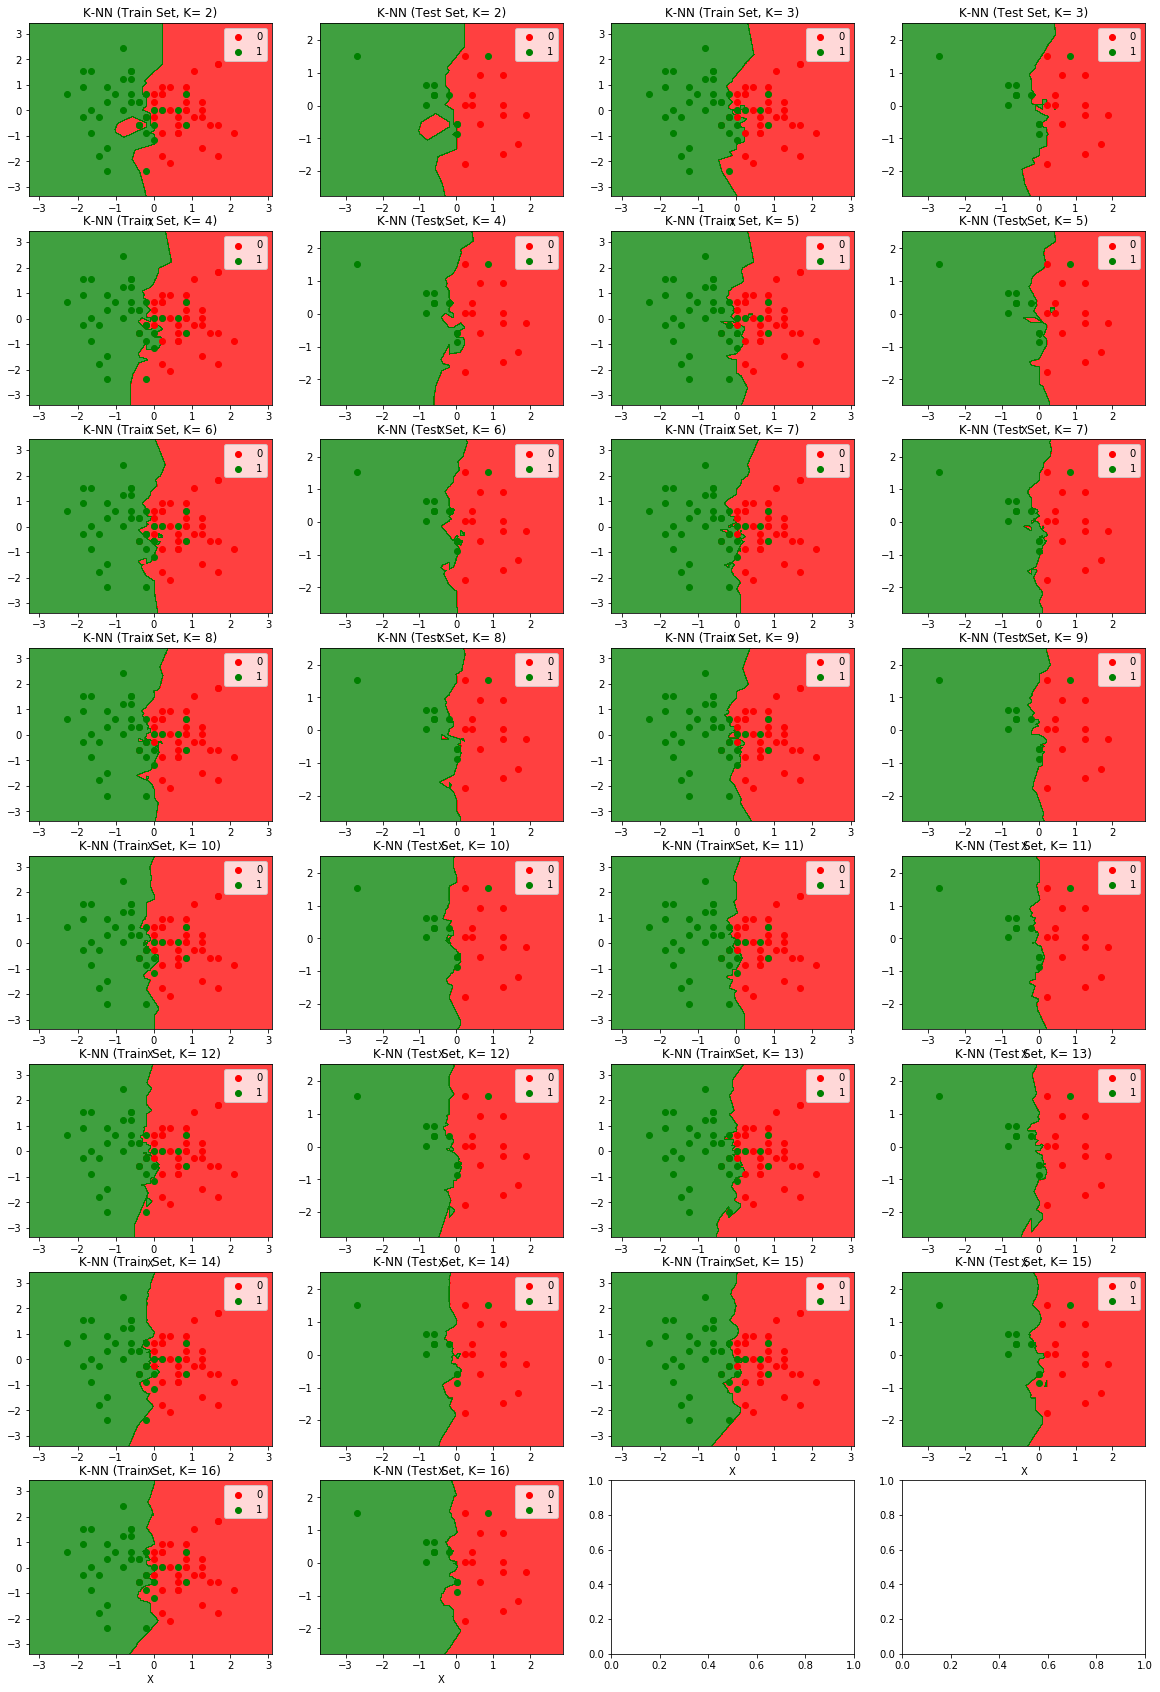

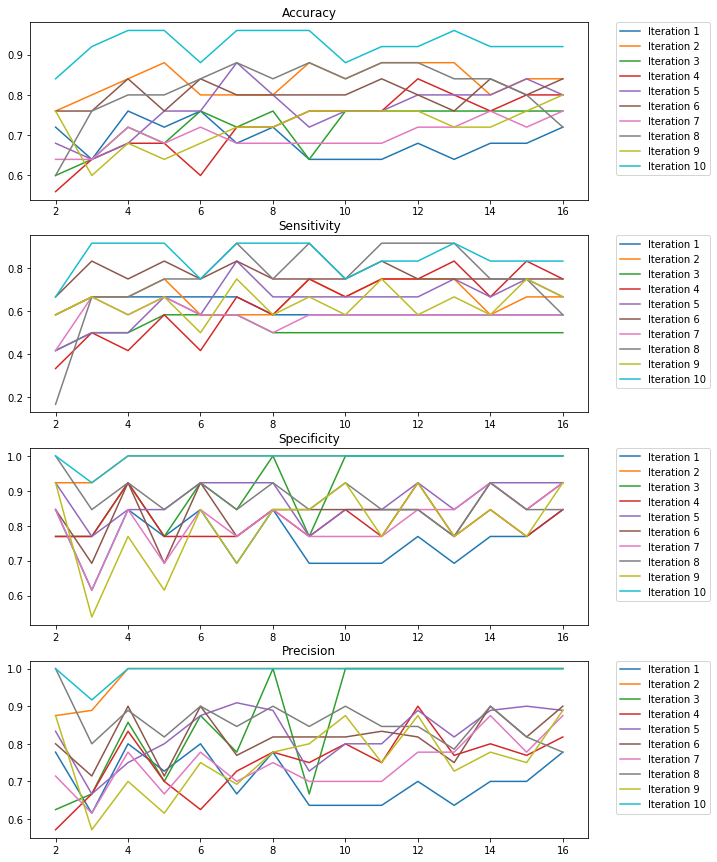

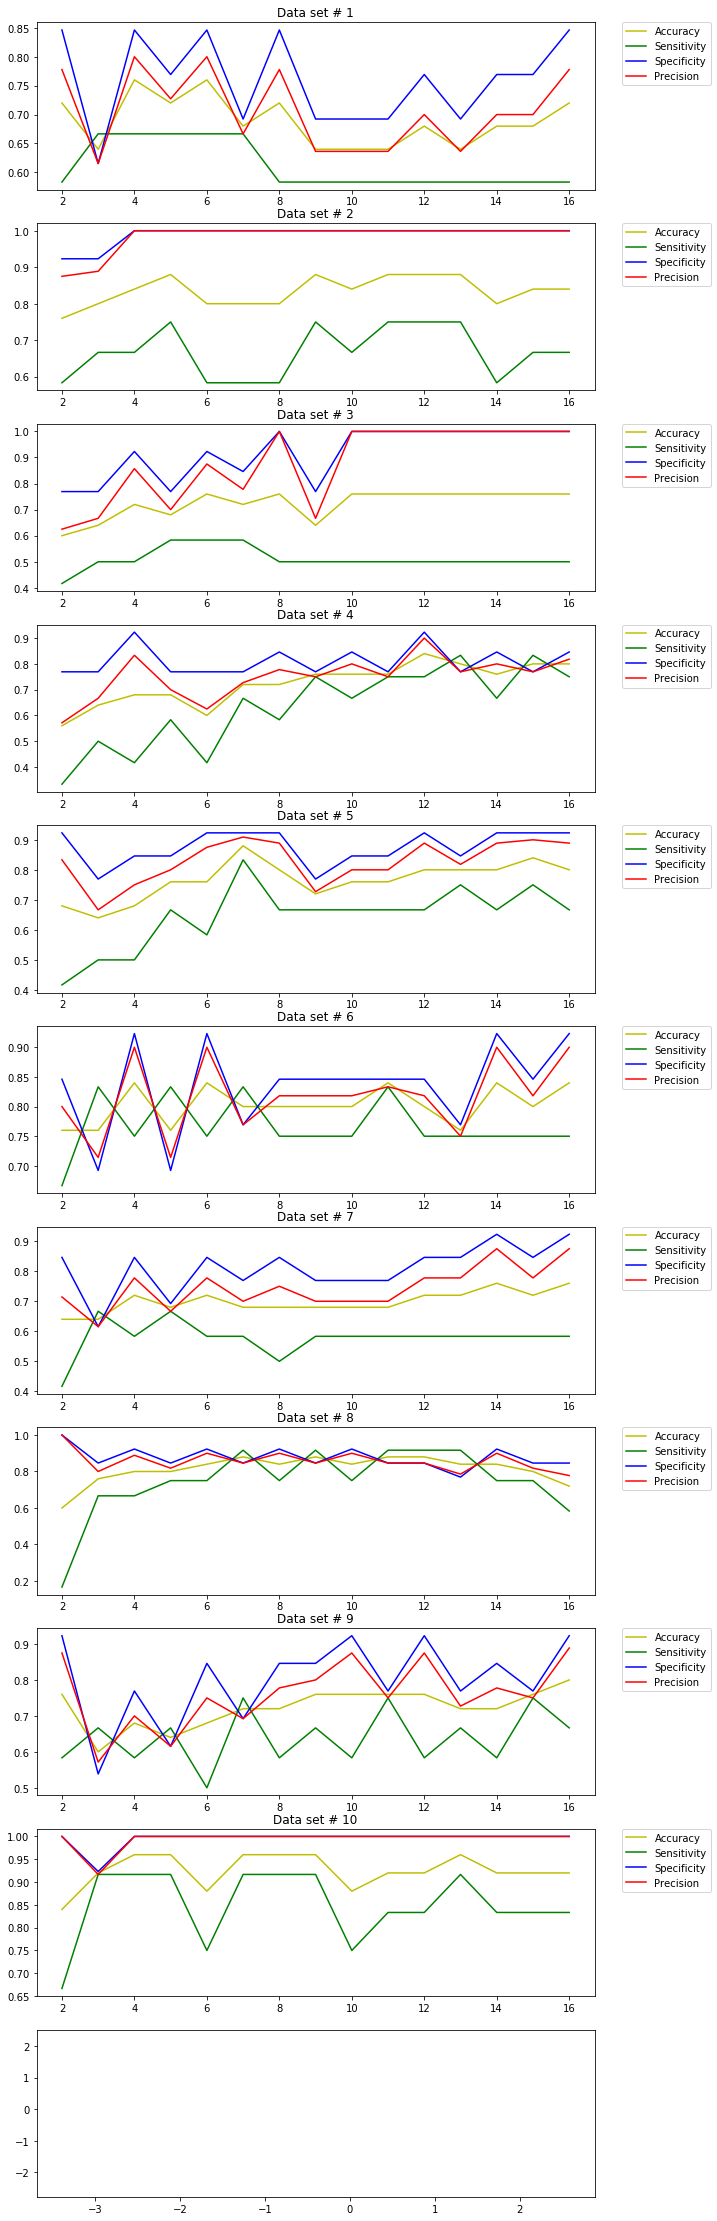

In [176]:
#Initialize multiple graph figure spaces outside the for loop, 
# so they don't get overwritten each iteration. 
fig, ax = plt.subplots(8,4 , figsize=(20,30)) # or max subplots = repeat_tests
# fig = plt.figure(figsize=(40,10))
fig2, ax2 = plt.subplots(4,1 , figsize=(10,15))
fig3, ax3 = plt.subplots(11,1 , figsize=(10,40))

# Option to run multiple times and multiple datasets
repeat_tests = 10

for test_number in range(repeat_tests):

    # Importing the dataset
    dataset = my_AB_XY_classification_data_builder(50)
    X = dataset.iloc[:, [0, 1]].values
    y = dataset.iloc[:, 2].values

    
    # Splitting the dataset into the Training set and Test set
    # will add cross validation later.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


    # Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    
    # Using the same split of data, vary the number of k. 
    # Each time, recalculate metrics
    k_start_neighbors = 2
    k_maximum_neighbors = 17
    mse_list_insample = []
    mse_list_out_of_sample = []
    plot_row_num = 0
    plot_col_num = 0
    
    #collect metrics for each k on a single data set, then reset for each new dataset
    accuracy=[]
    sensitivity= []
    specificity= []
    precision = []
    
    for k_neighbors in range(k_start_neighbors, k_maximum_neighbors):

        # Fitting K-NN to the Training set
        classifier = KNeighborsClassifier(n_neighbors = k_neighbors, metric = 'minkowski', p = 2)
        classifier.fit(X_train, y_train)

        # Predicting the Test set results
        y_pred = classifier.predict(X_test)
        
        
        # Making the Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        
        # calculate metrics
        acc, sens, spec, prec = my_classification_metrics(cm)
        accuracy.append(acc)
        sensitivity.append(sens)
        specificity.append(spec)
        precision.append(prec)
        

        # Visualising the results of the last set only because each interation takes a lot of time.
        if test_number == repeat_tests - 1:
            visualize_knn_results(X_train, y_train, "Train Set, K= " + str(k_neighbors), ax[plot_row_num][plot_col_num])
            plot_col_num += 1
            visualize_knn_results(X_test, y_test, "Test Set, K= " + str(k_neighbors), ax[plot_row_num][plot_col_num])
            plot_col_num += 1
        
            if plot_col_num %4==0: 
                plot_row_num +=1
                plot_col_num = 0

                
    # Print the Metrics a single line for each dataset
    ax2[0].plot(range(k_start_neighbors, k_maximum_neighbors), accuracy, label="Iteration " + str(test_number+1))
    ax2[0].set_title("Accuracy")
    ax2[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    _= ax2[1].plot(range(k_start_neighbors, k_maximum_neighbors), sensitivity, label="Iteration " + str(test_number+1))
    ax2[1].set_title("Sensitivity")
    ax2[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    _= ax2[2].plot(range(k_start_neighbors, k_maximum_neighbors), specificity, label="Iteration " + str(test_number+1))
    ax2[2].set_title("Specificity")
    ax2[2].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    _= ax2[3].plot(range(k_start_neighbors, k_maximum_neighbors), precision, label="Iteration " + str(test_number+1))
    ax2[3].set_title("Precision")
    ax2[3].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    accura_handle,= ax3[test_number].plot(range(k_start_neighbors, k_maximum_neighbors), accuracy, color='y', label='Accuracy')
    sensi_handle, = ax3[test_number].plot(range(k_start_neighbors, k_maximum_neighbors), sensitivity, color='g', label='Sensitivity')
    speci_handle, = ax3[test_number].plot(range(k_start_neighbors, k_maximum_neighbors), specificity, color = 'b', label='Specificity')
    precis_handle, = ax3[test_number].plot(range(k_start_neighbors, k_maximum_neighbors), precision, color='r', label='Precision')
    ax3[test_number].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax3[test_number].set_title("Data set # " + str(test_number+ 1))
    

## (Part 2) Pick a fixed K, then cycle through the thresholds (T) plot -  t/k 
- We will use a large K, so we can see what happens as we change t (threshold)

## (Part 3) ROC curve
- show the relationship between sensitivity and specificity. 
    - as specificity (1 - specificity) decreases the x-axis increases, and sensitivity should increase. 
    - There is usually an inverse relationship between specificity and sensitivity.
    - So as specificity decreases - sensitivity increases.
    
##  (Part 4) Make cost benefit matrix and graph
- with t on x-axis starting with t=-1 through t = k    

In [270]:
def my_cost_benefit_matrix():
    '''
    create a cost matrix and a benefit matrix
    Add them together
    Return the combined matrix
    
    The example I will use is if someone is sick, do we call an ambulance, and if so, at what point?
    
    Perspective is from the person who might be sick
    baseline is that the person was not sick
    '''
    # costs for each outcome
    # there was predicted no illness, and no ambulance was called, and they were not sick
    TN = 0
    # cost of calling ambulance, but nothing was wrong with the person. 
    # aka, we predicted they needed an ambulance but they really didn't
    FP = -300 
    # predicted they didn't need an ambulance, when they were dying. (A very high cost. paralysis, death, etc., loss of job)
    FN = -5000000
    # predicted they were sick, and we got them the ambulance that prevented all serious injury.
    # but there was the expense of paying the hospital in addition to the ambulance.
    TP = -25300
    
    cost_np = np.array([[TN, FP], [FN, TP]])
    
    # benefits of each outcome
    # there was predicted no illness, and no ambulance was called, and they were not sick
    TN = 0
    # cost of calling ambulance, but nothing was wrong with the person. 
    # aka, we predicted they needed an ambulance but they really didn't
    FP = 0 
    # predicted they didn't need an ambulance, when they were dying. (A very high cost. paralysis, death, etc., loss of job)
    FN = 0
    # predicted they were sick, and we got them the ambulance that prevented all serious injury.
    # but there was the expense of paying the hospital in addition to the ambulance.
    TP = 5000000
    
    # matrix is predict on columns are the predictions and the rows are the truth
    benefit_np = np.array([[TN, FP], [FN, TP]])
    
    return(cost_np + benefit_np)
      

/Users/michaelwoline/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/michaelwoline/anaconda2/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in long_scalars


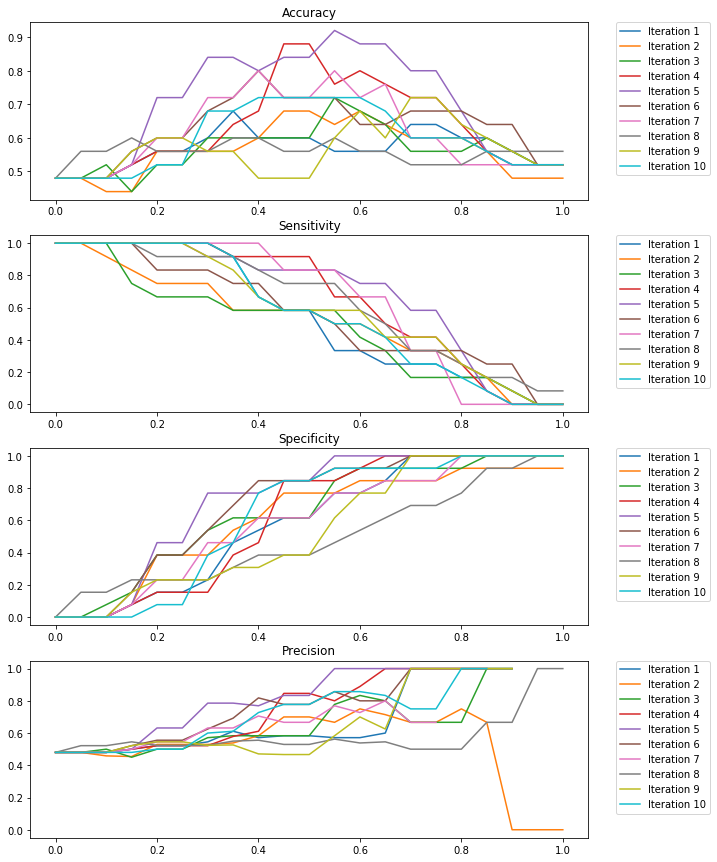

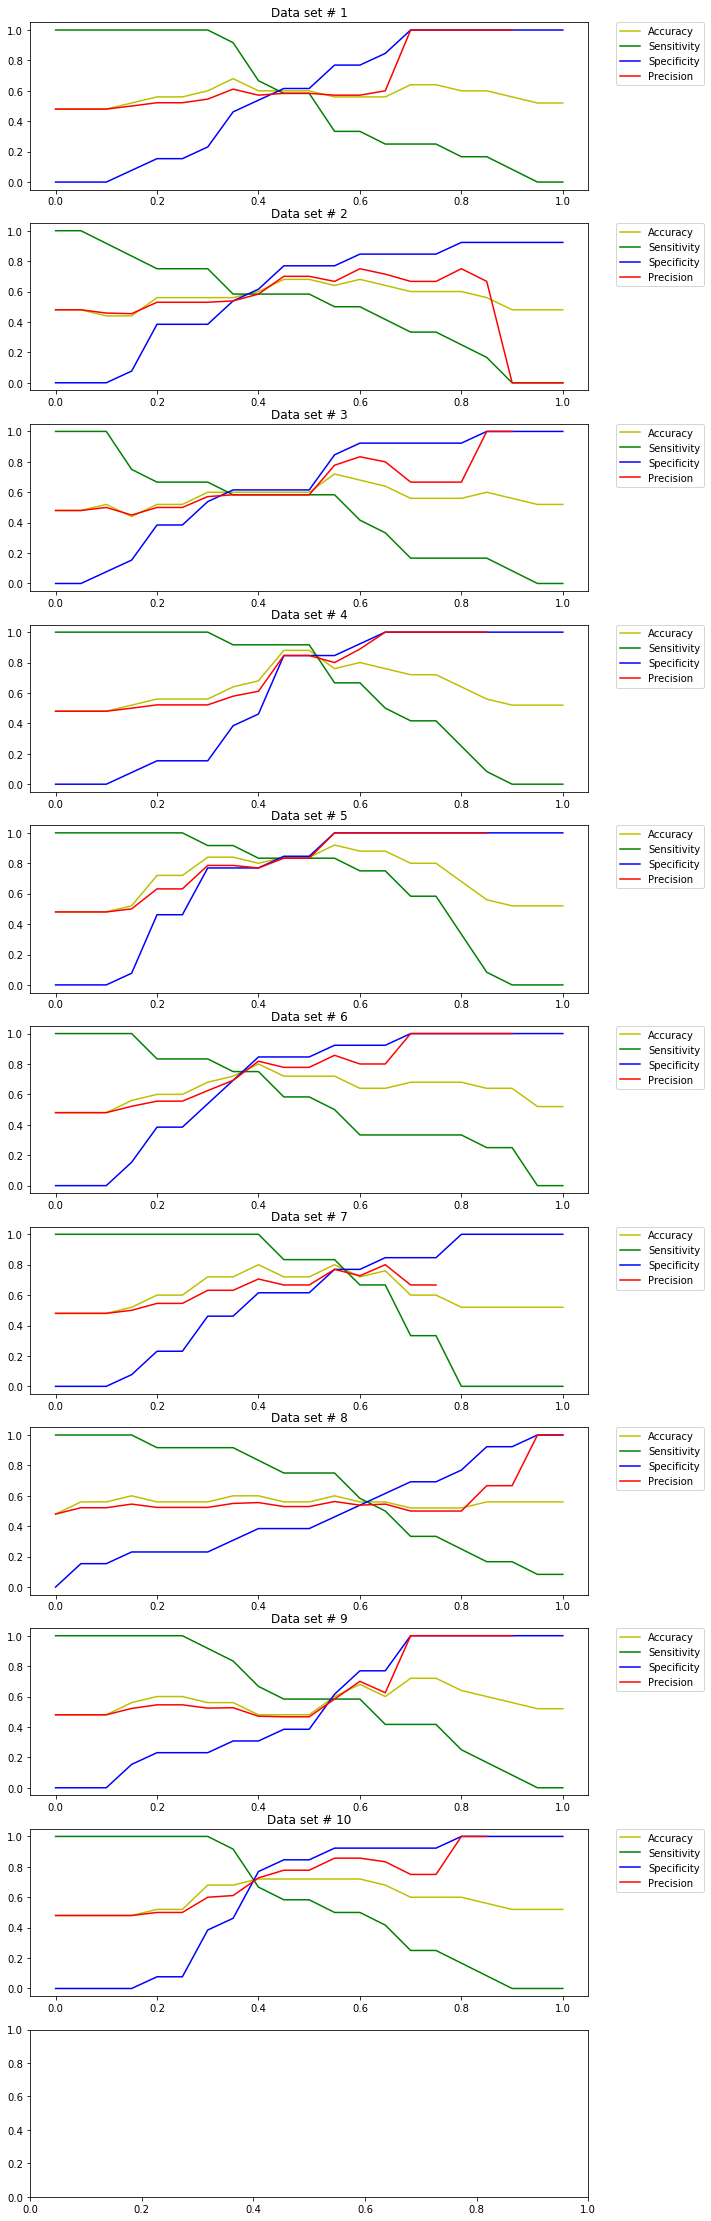

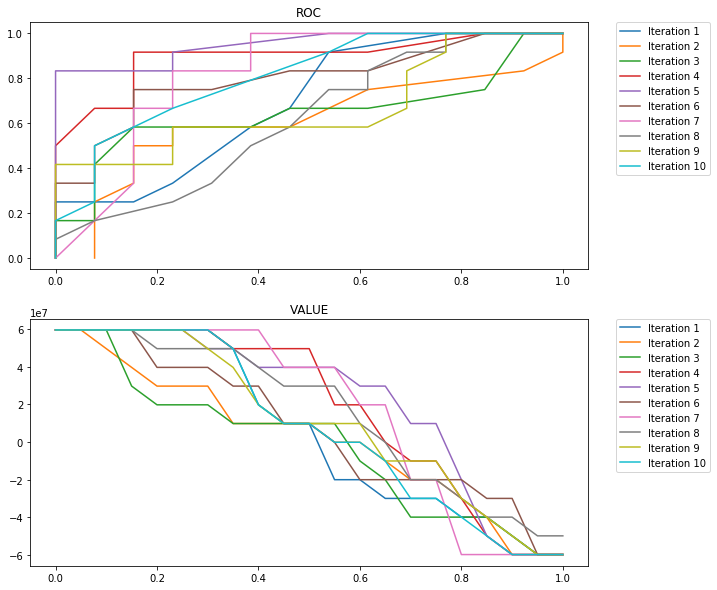

In [283]:
#Initialize multiple graph figure spaces outside the for loop, 
# so they don't get overwritten each iteration. 
# fig, ax = plt.subplots(8,4 , figsize=(20,30)) # or max subplots = repeat_tests
# fig = plt.figure(figsize=(40,10))
fig2, ax2 = plt.subplots(4,1 , figsize=(10,15))
fig3, ax3 = plt.subplots(11,1 , figsize=(10,40))
# fig4, ax4 = plt.subplots(2,1 , figsize=(10,10))
fig4 = plt.figure(figsize=(10,10))


# get my cost benefit matrix, since these are fixed values here, we will call once before going inside loops below. 
cost_benefit_matrix = my_cost_benefit_matrix()

# Option to run multiple times and multiple datasets
repeat_tests = 10

for test_number in range(repeat_tests):

    # Importing the dataset
    dataset = my_AB_XY_classification_data_builder(50)
    X = dataset.iloc[:, [0, 1]].values
    y = dataset.iloc[:, 2].values

    
    # Splitting the dataset into the Training set and Test set
    # will add cross validation later.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


    # Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    
    # Pick a large single K value to use while varying the threshold 
    # Each time, recalculate metrics
    k_start_neighbors = 16
    k_maximum_neighbors = 17
    mse_list_insample = []
    mse_list_out_of_sample = []
    plot_row_num = 0
    plot_col_num = 0
    
    #collect metrics for each k on a single data set, then reset for each new dataset
    accuracy=[]
    sensitivity= []
    specificity= []
    precision = []
    
    cost_benefit_times_confusion_matrix_sumed = []
    
    for k_neighbors in range(k_start_neighbors, k_maximum_neighbors):

        # Fitting K-NN to the Training set
        classifier = KNeighborsClassifier(n_neighbors = k_neighbors, metric = 'minkowski', p = 2)
        classifier.fit(X_train, y_train)

        # Predicting the Test set results
        y_pred_proba = classifier.predict_proba(X_test)
        
        # change the threshold that is needed in order to declare a winner for 1 or 0. 
        # we will use a for loop, and cycle through the each one, so we can plot later. 
        # create a function that will be applied across all elements of vector to convert the boolean outcome 
        # to a 1 or 0 based. Boolean criterea is passed in the for loop as decimal. 
        vfunc = np.vectorize(int)
        for threshold in np.linspace(0, 1, 21):
            #threshold is applied to the 1 prediction.
            
            y_pred = vfunc(y_pred_proba[:,1] >= threshold)
        
            # Making the Confusion Matrix
            cm = confusion_matrix(y_test, y_pred)

            
            # calculate metrics
            acc, sens, spec, prec = my_classification_metrics(cm)
            accuracy.append(acc)
            sensitivity.append(sens)
            specificity.append(spec)
            precision.append(prec)
        
            cost_benefit_times_confusion_matrix_sumed.append((cm*cost_benefit_matrix).sum()) 
        
        
        # Visualising the results of the last set only because each interation takes a lot of time.
#         if test_number == repeat_tests - 1:
#             visualize_knn_results(X_train, y_train, "Train Set, K= " + str(k_neighbors), ax[plot_row_num][plot_col_num])
#             plot_col_num += 1
#             visualize_knn_results(X_test, y_test, "Test Set, K= " + str(k_neighbors), ax[plot_row_num][plot_col_num])
#             plot_col_num += 1
        
#             if plot_col_num %4==0: 
#                 plot_row_num +=1
#                 plot_col_num = 0
                
    # Print the Metrics a single line for each dataset
    ax2[0].plot(np.linspace(0,1,21), accuracy, label="Iteration " + str(test_number+1))
    ax2[0].set_title("Accuracy")
    ax2[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    _= ax2[1].plot(np.linspace(0,1,21), sensitivity, label="Iteration " + str(test_number+1))
    ax2[1].set_title("Sensitivity")
    ax2[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    _= ax2[2].plot(np.linspace(0,1,21), specificity, label="Iteration " + str(test_number+1))
    ax2[2].set_title("Specificity")
    ax2[2].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    _= ax2[3].plot(np.linspace(0,1,21), precision, label="Iteration " + str(test_number+1))
    ax2[3].set_title("Precision")
    ax2[3].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    accura_handle,= ax3[test_number].plot(np.linspace(0,1,21), accuracy, color='y', label='Accuracy')
    sensi_handle, = ax3[test_number].plot(np.linspace(0,1,21), sensitivity, color='g', label='Sensitivity')
    speci_handle, = ax3[test_number].plot(np.linspace(0,1,21), specificity, color = 'b', label='Specificity')
    precis_handle, = ax3[test_number].plot(np.linspace(0,1,21), precision, color='r', label='Precision')
    ax3[test_number].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax3[test_number].set_title("Data set # " + str(test_number+ 1))
    
    
    # Plot the ROC curve with Sensitivity on the left and linspace on the bottom
    fig4
    plt.subplot(211)
    
    plt.plot((1-np.array(specificity)), sensitivity, label="Iteration " + str(test_number+1))
    plt.title("ROC")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.subplot(212)
    plt.plot(np.linspace(0,1,21), cost_benefit_times_confusion_matrix_sumed, label="Iteration " + str(test_number+1))
    plt.title("VALUE")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
#     _= ax4[0].plot((1-np.array(specificity)), sensitivity, label="Iteration " + str(test_number+1))
#     ax4[0].set_title("ROC")
#     ax4[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#     # Plot the VALUE curve with value=sum of cm * cost_bene as y asix and linspace on the bottom for thresholds
#     _= ax5[0].plot((1-np.array(specificity)), sensitivity, label="Iteration " + str(test_number+1))
#     ax5[0].set_title("ROC")
#     ax5[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    

In [278]:
print(cm*cost_benefit_matrix)
print((cm*cost_benefit_matrix).sum())

[[       0    -3900]
 [       0 59696400]]
59692500


In [269]:
# confirming that the confusion matrix used columns for the prediction and rows for the truth
cm = confusion_matrix(y_test, y_pred)
print(cm)

print (y_pred)
print(y_test)
confusion_matrix(y_pred, y_test)

[[13  0]
 [12  0]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0]


array([[13, 12],
       [ 0,  0]])

## ROC Curve specificity vs. sensitivity
- reason for curve is demonstrates sensitivity/secificity tradeoff. 
- also used to choose an appropriate model, selecting the optimal parameters for our model such as K (compare "Models")
- do I predict cancer more often with a greater sensitivity
- or, do we predict spam less often with specificity. We don't want too many good emails to be filtered. 


- When there is no curve, but rather a straight line from 0,0 to (1,1)
    - we are only do as well as random chance. 
    - no matter where we slide up and down the line.
- when we dip below the straight line:
    - we are now doing worse than chance.
    - when test data dips below straight line we are worse than chance.

#### Process
- Fit/predict -> confusion matrix -> ROC curve
    - add confusion matrix to cost benefit matrix -> Cost curve
        - from cost curve select threshold elementwise multiply C&B matrix vs. confustion matrix and sum
        - get a cost curve that is cost for Y and threshold for x

- Process in a list:
    - 0. regularization, find find your k
    - 1. threshold to select with a fixed K
    - 2. ROC Curve
    - 3. cost/benefit matrix multiply by confusion matrix
    - 4. create cost curve.